# 2021/10/24
# 本代码绘制四月和六月的平均流场及降水
# 组会用

In [1]:
import os
import sys
import xarray as xr
import numpy as np
module_path = ["/home/sun/mycode/module/","/data5/2019swh/mycode/module/"]
sys.path.append(module_path[0])
from module_sun import *
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
from metpy.units import units
from matplotlib.path import Path
import matplotlib.patches as patches

In [2]:
#先处理四六月的降水平均
pre_test  =  xr.open_dataset("/home/sun/qomo-data/year_mean/gpcp_97_19/gpcp_0125.climate.nc")
avg_pre   =  np.zeros((2,pre_test.precip.data.shape[1],pre_test.precip.data.shape[2]))
path_pre  =  "/home/sun/qomo-data/year_mean/gpcp_97_19/"
file_pre  =  os.listdir(path_pre)  ;  file_pre.sort()


for i in range(90,92):
    f1  =  xr.open_dataset(path_pre+file_pre[i])
    f2  =  xr.open_dataset(path_pre+file_pre[i+30])
    avg_pre[0,:]  +=  f1.precip.data[0,:]/30
    avg_pre[1,:]  +=  f2.precip.data[0,:]/30

#处理925hPa的风场平均
wind_test  =  xr.open_dataset("/home/sun/qomo-data/year_mean/multi/0918.climate.nc").sel(lev=925)
avg_uwind  =  np.zeros((2,wind_test.U.data.shape[1],wind_test.U.data.shape[2]))
avg_vwind  =  avg_uwind.copy()
path_wind  =  "/home/sun/qomo-data/year_mean/multi/"
file_wind  =  os.listdir(path_wind)  ;  file_wind.sort()

for i in range(0,30):
    f3  =  xr.open_dataset(path_wind+file_wind[i]).sel(lev=925)
    f4  =  xr.open_dataset(path_wind+file_wind[i+150]).sel(lev=925)
    avg_uwind[0,:]  +=  f3.U.data[0,:]/30
    avg_uwind[1,:]  +=  f4.U.data[0,:]/30
    avg_vwind[0,:]  +=  f3.V.data[0,:]/30
    avg_vwind[1,:]  +=  f4.V.data[0,:]/30


In [3]:
'''设置绘图区域'''
lonmin,lonmax,latmin,latmax  =  60,120,0,30
extent     =  [lonmin,lonmax,latmin,latmax]
tmin,tmax  =  120,150 
level      =  925

props = dict(boxstyle='square', facecolor='white', alpha=1)

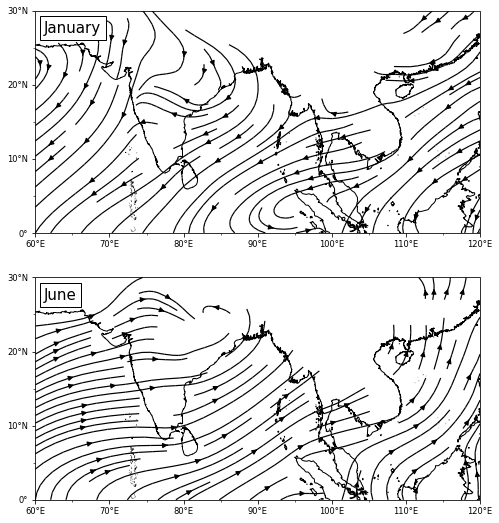

In [4]:
proj    =  ccrs.PlateCarree()
fig1    =  plt.figure(figsize=(16,9)) ; fig1.tight_layout()
spec1   =  fig1.add_gridspec(nrows=2,ncols=1)
months  =  ["January","June"]

os.system("mkdir -p /home/sun/paint/pentad_stream_prect")
for row in range(0,2):
    ax = fig1.add_subplot(spec1[row,0],projection=proj)
    ax.coastlines(resolution='10m',lw=1)
    # 设置经纬度刻度.
    set_map_ticks(ax, dx=10, dy=10, nx=1, ny=1, labelsize='small')
    ax.set_extent(extent, crs=proj)
    
    #im  =  ax.contourf(pre_test.longitude.data,pre_test.latitude.data,avg_pre[row,:],levels=np.linspace(2,20,10),cmap='Blues',alpha=1,extend='both')
    ax.streamplot(wind_test.lon.data, wind_test.lat.data, 
                  avg_uwind[row,:], avg_vwind[row,:], 
                  color='k',linewidth=1.2,
                 density=1)
    ax.text(0.02,0.9,months[row],transform=ax.transAxes,bbox=props,fontsize=15)

#os.system("mkdir -p /home/sun/paint/jan_june_925_stream")
plt.savefig('/home/sun/paint/jan_june_925_stream/925_stream.pdf', bbox_inches='tight',dpi=1200)
plt.show()


In [5]:
f1.precip.data[0,:]

array([[0.21260369, 0.24234825, 0.2402872 , ..., 0.46447173, 0.24393293,
        0.24364504],
       [0.16146304, 0.15620986, 0.15831496, ..., 0.16047893, 0.16035357,
        0.15726778],
       [0.09133209, 0.20850027, 0.06613598, ..., 0.09366244, 0.09339356,
        0.09246684],
       ...,
       [0.6060722 , 0.48465568, 0.48116112, ..., 0.46132392, 0.47474796,
        0.49991617],
       [0.49163577, 0.46933258, 0.46606565, ..., 0.41496435, 0.4498505 ,
        0.49058223],
       [0.30312726, 0.29075488, 0.31516367, ..., 0.3153204 , 0.31440377,
        0.31354052]], dtype=float32)

In [6]:
avg_pre[1,:]

array([[0.01839159, 0.01833563, 0.01838592, ..., 0.01742967, 0.01837287,
        0.0173811 ],
       [0.01097883, 0.01126175, 0.01143088, ..., 0.01082713, 0.01086733,
        0.01111085],
       [0.01447761, 0.01437842, 0.01401489, ..., 0.01468421, 0.01427374,
        0.01450822],
       ...,
       [0.00302895, 0.00277265, 0.00284544, ..., 0.00287422, 0.00287064,
        0.00195094],
       [0.00316103, 0.00317033, 0.00305214, ..., 0.00273576, 0.00309732,
        0.00186148],
       [0.0069256 , 0.00164364, 0.00275066, ..., 0.00271825, 0.00288965,
        0.00265333]])